In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [8]:
# Cargar el dataset
df = pd.read_csv('car data.csv')

In [10]:
# 1. Información general del dataset
print("Información del dataset:")
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [12]:
# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [28]:
# 3. Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Reemplazar valores faltantes en columnas numéricas con la media de cada columna
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].fillna(df[column].mean())


Valores faltantes por columna:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


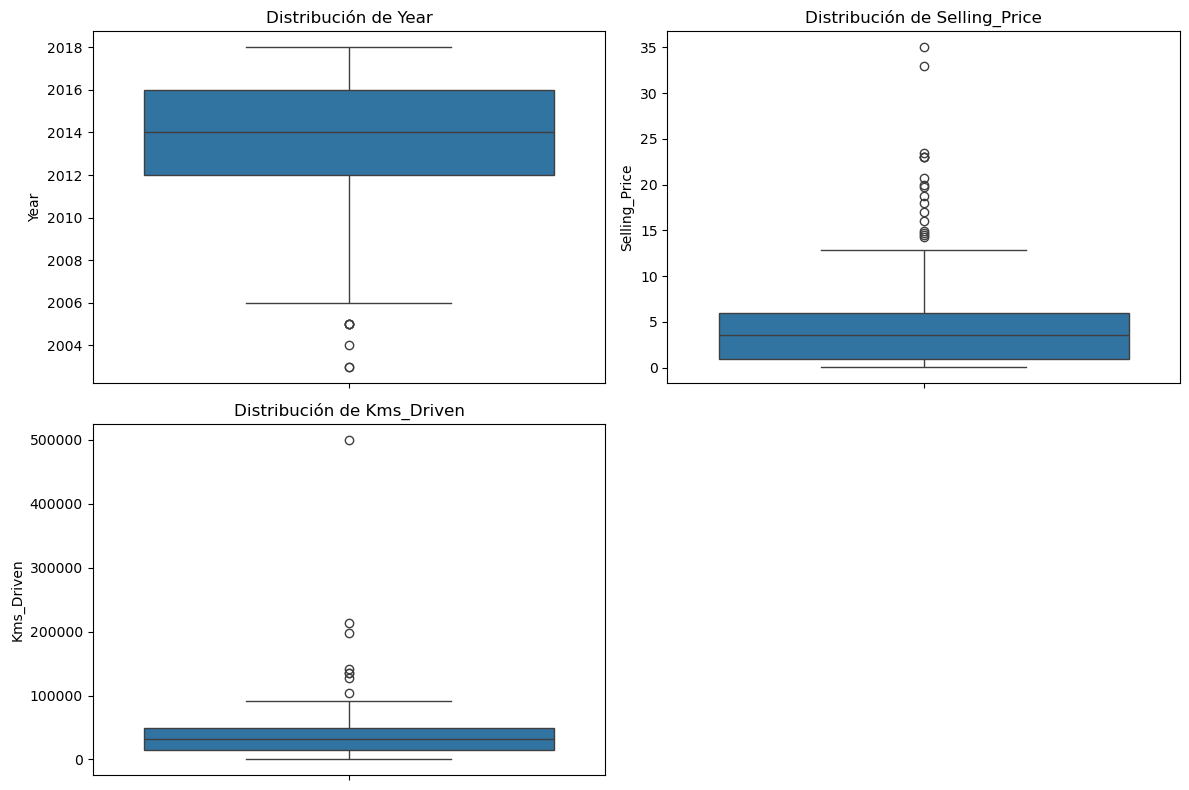

In [22]:
# 4. Identificación y visualización de datos atípicos usando diagramas de caja
plt.figure(figsize=(12, 8))
numerical_features = ['Year', 'Selling_Price', 'Kms_Driven']
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[column])
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

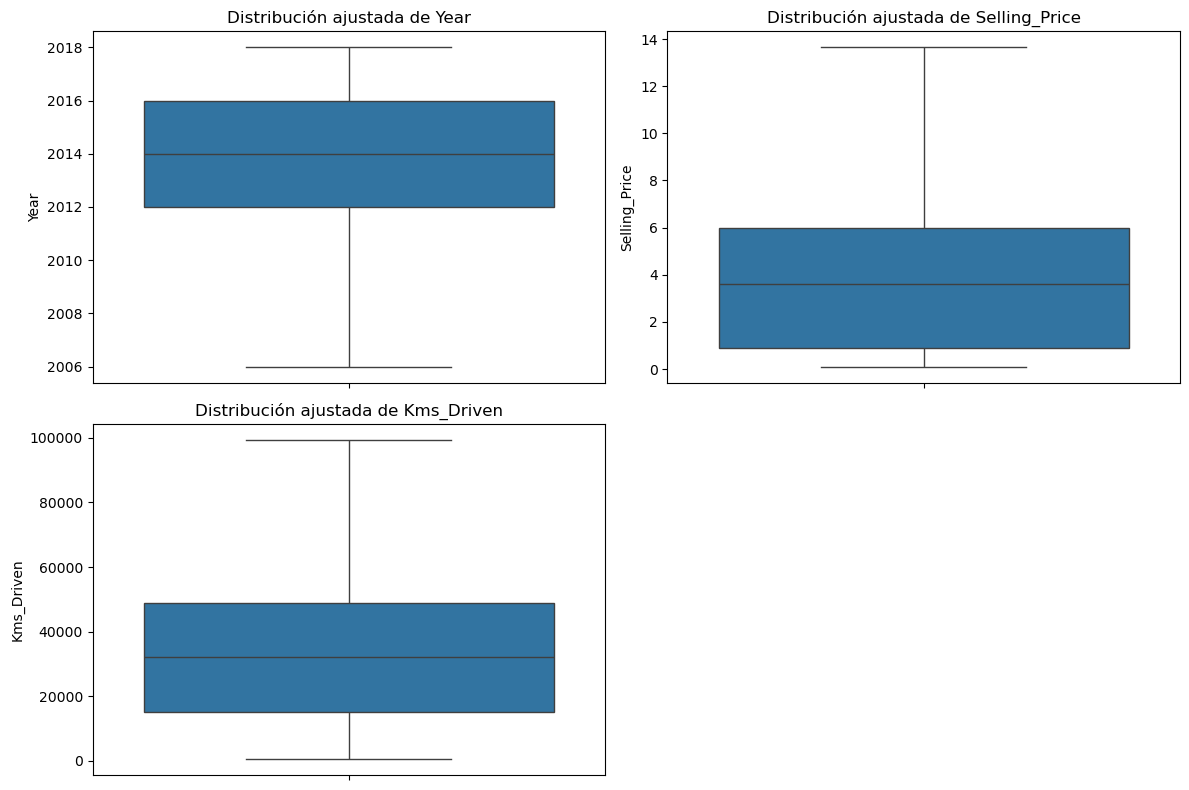

In [24]:
# Ajuste de datos atípicos: limitar los valores en un rango intercuartil (IQR)
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Verificación de que se hayan ajustado los datos atípicos
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[column])
    plt.title(f'Distribución ajustada de {column}')
plt.tight_layout()
plt.show()


In [42]:
# Preprocesamiento de datos
# Seleccionar solo las columnas necesarias
df = df[['Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]


# Codificar variables categóricas
label_encoders = {}
for column in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Definir variables independientes (X) y dependiente (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Error cuadrático medio: 3.6698113183585424
Coeficientes: [ 3.98676959e-01  1.59137465e-05 -2.46051417e+00 -4.00717507e+00
 -2.84801036e+00  1.35699979e-01]
Intercepto: -790.7792528190645


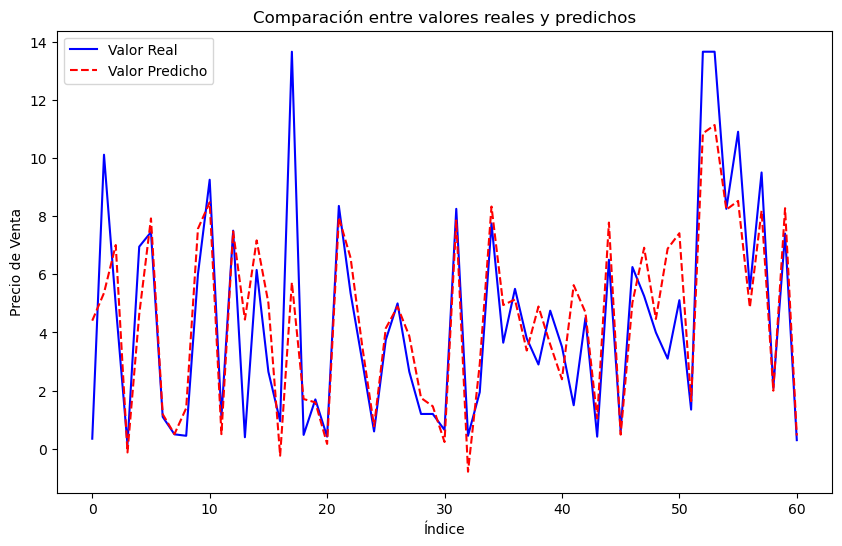

C:\Users\Tc01\AppData\Local\Temp\ipykernel_19608\3138578450.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


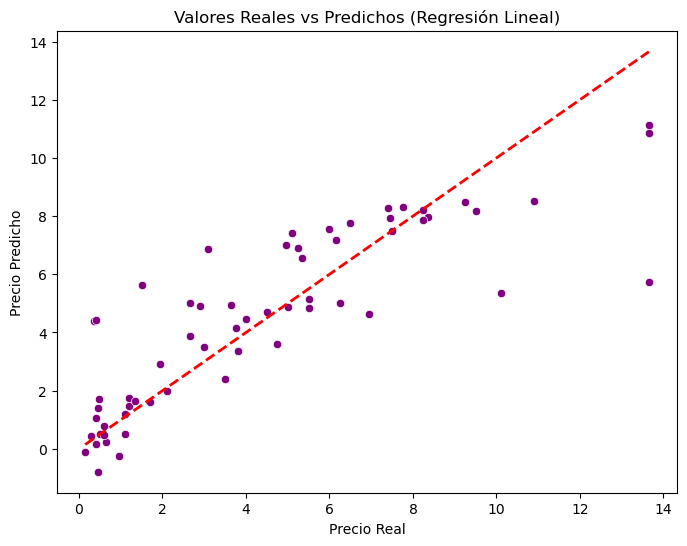

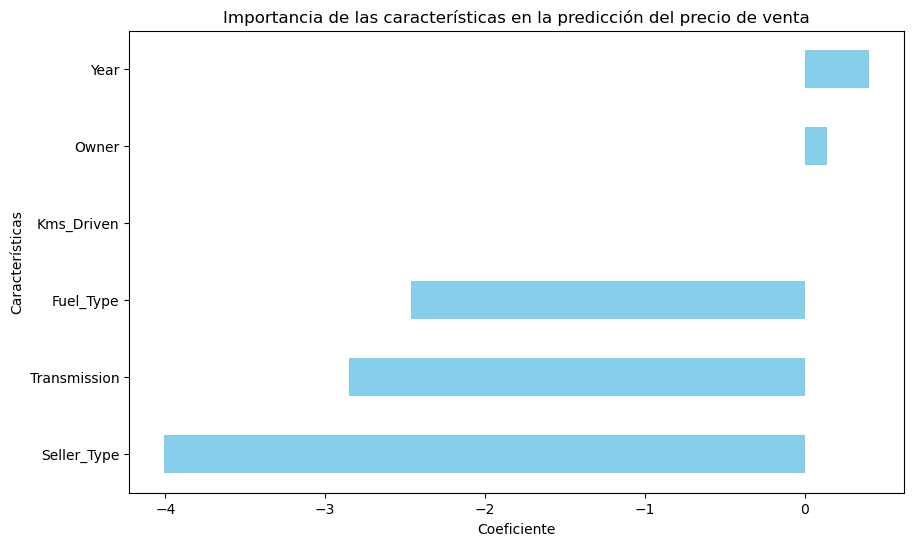

In [44]:
# 1. Gráfica de comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valor Real", color="b")
plt.plot(y_pred, label="Valor Predicho", color="r", linestyle="--")
plt.xlabel("Índice")
plt.ylabel("Precio de Venta")
plt.title("Comparación entre valores reales y predichos")
plt.legend()
plt.show()

C:\Users\Tc01\AppData\Local\Temp\ipykernel_19608\3121933868.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


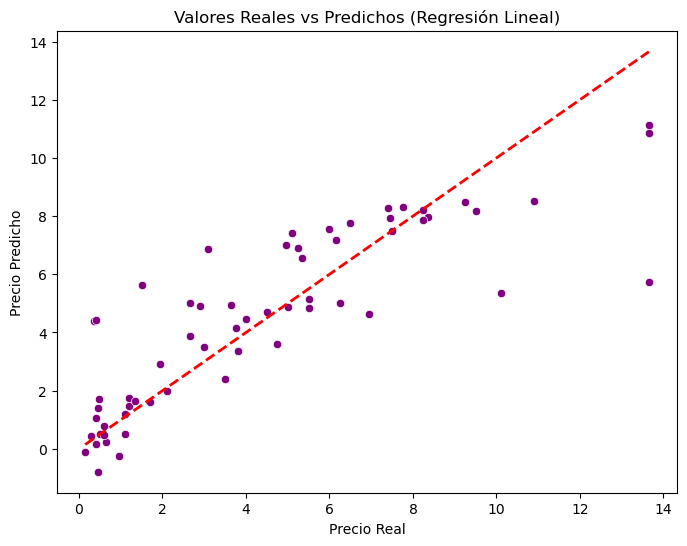

In [50]:
# 2. Gráfica de dispersión de los valores predichos vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Valores Reales vs Predichos (Regresión Lineal)")
plt.show()

In [ ]:

# 3. Gráfica de importancia de las características (coeficientes del modelo)
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values()
feature_importance.plot(kind='barh', color="skyblue")
plt.title("Importancia de las características en la predicción del precio de venta")
plt.xlabel("Coeficiente")
plt.ylabel("Características")
plt.show()